# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #ставим \t, чтобы таблица отображалась нормально
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.columns #смотрим какие колонки есть, т.к. не все вижно на предыдущем шаге

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None) #делаем чтобы видеть все столбцы

In [5]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6054,6,5800000.0,87.00,2017-12-08T00:00:00,3,2.93,5.0,55.0,1,False,False,False,9.00,NaN,Санкт-Петербург,43411.0,8386.0,1.0,342.0,0.0,NaN,313.0
13167,20,6300000.0,55.00,2017-05-15T00:00:00,2,3.20,4.0,34.0,4,NaN,False,False,9.00,0.0,Санкт-Петербург,24521.0,4927.0,1.0,196.0,0.0,NaN,82.0
11764,0,4700000.0,85.00,2015-10-27T00:00:00,3,NaN,10.0,52.0,1,NaN,False,False,11.00,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,272.0
6269,7,14900000.0,132.00,2015-12-25T00:00:00,4,4.00,5.0,90.0,2,False,False,False,11.00,1.0,Санкт-Петербург,21643.0,1200.0,1.0,527.0,2.0,116.0,232.0
19670,4,8299000.0,86.20,2018-10-16T00:00:00,4,3.06,6.0,59.7,2,NaN,False,False,13.90,NaN,Санкт-Петербург,31078.0,3419.0,0.0,NaN,0.0,NaN,NaN
19,16,14200000.0,121.00,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,NaN,False,False,12.00,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
13731,2,8000000.0,61.50,2018-02-21T00:00:00,3,3.00,6.0,42.6,1,NaN,False,False,7.90,NaN,Санкт-Петербург,24188.0,4597.0,1.0,451.0,0.0,NaN,96.0
21833,7,3400000.0,30.00,2018-11-11T00:00:00,1,2.50,9.0,15.5,9,NaN,False,False,7.20,NaN,Санкт-Петербург,42138.0,14642.0,1.0,612.0,0.0,NaN,18.0
21055,8,4900000.0,74.10,2017-04-21T00:00:00,3,NaN,4.0,47.6,2,False,False,False,8.30,0.0,Колпино,26528.0,32314.0,2.0,514.0,2.0,187.0,53.0
12023,4,7090000.0,56.13,2018-10-06T00:00:00,2,2.65,25.0,NaN,19,NaN,False,False,11.55,1.0,Санкт-Петербург,7114.0,13330.0,1.0,903.0,0.0,NaN,45.0


In [6]:
data['locality_name'].value_counts() #смотрим какие населенные пункты встречаются чаще всего

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
село Никольское               1
поселок Красносельское        1
деревня Мануйлово             1
поселок Кирпичное             1
посёлок Шугозеро              1
Name: locality_name, Length: 364, dtype: int64

In [7]:
data.info() #смотрим где есть пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [8]:
data.describe() #смотрим на количественные значения, чтобы сразу увидеть выборсы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [9]:
data.query('ceiling_height > 10').count()

total_images            25
last_price              25
total_area              25
first_day_exposition    25
rooms                   25
ceiling_height          25
floors_total            25
living_area             25
floor                   25
is_apartment            12
studio                  25
open_plan               25
kitchen_area            20
balcony                 18
locality_name           25
airports_nearest        16
cityCenters_nearest     16
parks_around3000        16
parks_nearest            8
ponds_around3000        16
ponds_nearest            8
days_exposition         19
dtype: int64

In [10]:
data.query('ceiling_height > 10').sort_values(by='ceiling_height', ascending=False).head() 
#видим, что есть высота потолков больше 10 метров. возможно записали в сантиметрах, но значений 25 шт.



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,False,False,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


### Вывод

Просмотрев данные, мы увидели, что есть много пробелов, которые есть чем заменить, где то нулями - как с количеством балконов, где то медианными значениями. А где то - с расстояниями до аэропорта или наличие пруда, то оставим как есть.

## Предобработка данных

В этом разделе заполним пропущенные значения, начнем с ceiling_height - высотой потолка. Из прошлого шага мы видим, что медиана 2.77, в целом разумно и не выбивается за рамки логики.

In [11]:
data_prep = data
data_prep.head() #будем работать с копией датафрейма, чтобы не портить основной - data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
data_prep['ceiling_height'] = data_prep['ceiling_height'].fillna(2.77)

In [13]:
data_prep.info() #проверяем, что заменились NaN в ceiling_height

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [80]:
round(data_prep['floors_total'].mean(), 0)

11.0

In [81]:
data_prep['floors_total'] = data_prep['floors_total'].fillna(round(data_prep['floors_total'].mean(), 0)) #также заменим на медиану 11 общее количество этажей

In [15]:
#living_area - жилой площадью оставим как есть, т.к. не можем логично заполнить данные и удалить 2000 значений тоже

In [16]:
data_prep['kitchen_area'] = data_prep['kitchen_area'].fillna(0) 
#заменяем на 0, т.к не указано сколько размер кухни,
#что можем предположить, кухня совмещена с комнатой

In [17]:
data_prep['balcony'] = data_prep['balcony'].fillna(0) 
#заменяем на 0, тк балкона нет

In [18]:
data_prep['locality_name'] = data_prep['locality_name'].dropna() #дропаем те значниения, которые NaN, их 49 шт

In [19]:
data_prep['days_exposition'] = data_prep['days_exposition'].fillna(181)
#также заменим на медиану 181 

In [20]:
data_prep['first_day_exposition'] = pd.to_datetime(data_prep['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#переведем колонку в тип daytime

In [21]:
data_prep['floors_total'] = data_prep['floors_total'].astype('int64')

Изменение типов данных: в принципе можно поменять например количество балконов с float на int, т.к. не может быть полвины балкона. Также количество этажей, и где находится квартира. вопрос в том, нужно ли это для чего то, кроме как проверить знание студента это менять?:)

In [22]:
data_prep.info() #проверяем изменения типов, и вопрос locality_name почему то не дропнул пустые. Можете сказать почему?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aro

In [83]:
data_prep['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

## Расчёты и добавление результатов в таблицу

посчитано и добавлено в таблицу: цена квадратного метра
 посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
 посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
 посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

In [23]:
data_prep['price_m'] = (data_prep['last_price'] / data_prep['total_area']).round(1)
#добавляем цену квадратного метра price_m и округляем до 1 знака после запятой
data_prep.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,181.0,120370.4
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8
2,10,5196000.0,56.0,2015-08-20,2,2.77,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7
3,0,64900000.0,159.0,2015-07-24,3,2.77,14,NaN,9,NaN,False,False,0.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0


In [24]:
data_prep['price_m'] = (data_prep['last_price'] / data_prep['total_area']).round(1)
#добавляем цену квадратного метра price_m и округляем до 1 знака после запятой

In [25]:
data_prep.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_m'],
      dtype='object')

In [26]:
data_prep.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,181.0,120370.4
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8
2,10,5196000.0,56.0,2015-08-20,2,2.77,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7
3,0,64900000.0,159.0,2015-07-24,3,2.77,14,NaN,9,NaN,False,False,0.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0


In [27]:
data_cleared = data_prep.drop(columns = ['is_apartment', 'studio', 
                                          'open_plan','airports_nearest','parks_around3000', 
                                          'parks_nearest', 'ponds_around3000','ponds_nearest','total_images'])
#убрать не нужные колонки, чтобы место не занимали, но основной датафрейм не трогаем

In [28]:
data_cleared.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'locality_name', 'cityCenters_nearest',
       'days_exposition', 'price_m'],
      dtype='object')

In [29]:
#меняем положение столбцов, удобнее чтобы видть цену метра рядом с ценой
data_cleared = data_cleared.reindex(columns=['last_price', 'price_m', 'total_area','days_exposition', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'locality_name', 'cityCenters_nearest'])

In [30]:
data_cleared.head()

,last_price,price_m,total_area,days_exposition,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest
0,13000000.0,120370.4,108.0,181.0,2019-03-07,3,2.70,16,51.0,8,25.0,0.0,Санкт-Петербург,16028.0
1,3350000.0,82920.8,40.4,81.0,2018-12-04,1,2.77,11,18.6,1,11.0,2.0,посёлок Шушары,18603.0
2,5196000.0,92785.7,56.0,558.0,2015-08-20,2,2.77,5,34.3,4,8.3,0.0,Санкт-Петербург,13933.0
3,64900000.0,408176.1,159.0,424.0,2015-07-24,3,2.77,14,NaN,9,0.0,0.0,Санкт-Петербург,6800.0
4,10000000.0,100000.0,100.0,121.0,2018-06-19,2,3.03,14,32.0,13,41.0,0.0,Санкт-Петербург,8098.0


In [31]:
data_cleared['year_exposition'] = data_cleared['first_day_exposition'].dt.year
data_cleared['month_exposition'] = data_cleared['first_day_exposition'].dt.month_name() 
data_cleared['weekday_exposition'] = data_cleared['first_day_exposition'].dt.day_name() 
#вводим новые колонки с годом, названием месяца и дня

In [32]:
#создадим функцию, которая будет смотреть какой этаж и делать группу с первым, последним и другим

def floor_position(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [33]:
data_cleared['floor_cat'] =  data_cleared.apply(floor_position, axis=1) #применяем

In [34]:
data_cleared.query('floor_cat == "последний"').head() #проверяем

,last_price,price_m,total_area,days_exposition,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,year_exposition,month_exposition,weekday_exposition,floor_cat
12,3890000.0,72037.0,54.0,90.0,2016-06-30,2,2.77,5,30.0,5,9.0,0.0,Сертолово,NaN,2016,June,Thursday,последний
13,3550000.0,82943.9,42.8,366.0,2017-07-01,2,2.56,5,27.0,5,5.2,1.0,Петергоф,33058.0,2017,July,Saturday,последний
23,2950000.0,92187.5,32.0,615.0,2016-10-29,1,2.60,9,17.7,9,6.1,0.0,Санкт-Петербург,14211.0,2016,October,Saturday,последний
36,3790000.0,84222.2,45.0,139.0,2017-01-25,2,2.77,9,27.0,9,6.3,2.0,Санкт-Петербург,16461.0,2017,January,Wednesday,последний
43,9330000.0,194375.0,48.0,763.0,2017-01-10,2,3.00,4,28.0,4,7.5,0.0,Санкт-Петербург,10822.0,2017,January,Tuesday,последний


In [35]:
#введем новую колонку living_total_area - соотношение жилой и общей площади

data_cleared['living_total_area'] = data_cleared['living_area'] / data_cleared['total_area']


In [36]:
#введем новую колонку kitchen_total_area - отношение площади кухни к общей

data_cleared['kitchen_total_area'] = data_cleared['kitchen_area'] / data_cleared['total_area']

In [37]:
data_cleared.head() #проверяем, всё есть

,last_price,price_m,total_area,days_exposition,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,year_exposition,month_exposition,weekday_exposition,floor_cat,living_total_area,kitchen_total_area
0,13000000.0,120370.4,108.0,181.0,2019-03-07,3,2.70,16,51.0,8,25.0,0.0,Санкт-Петербург,16028.0,2019,March,Thursday,другой,0.472222,0.231481
1,3350000.0,82920.8,40.4,81.0,2018-12-04,1,2.77,11,18.6,1,11.0,2.0,посёлок Шушары,18603.0,2018,December,Tuesday,первый,0.460396,0.272277
2,5196000.0,92785.7,56.0,558.0,2015-08-20,2,2.77,5,34.3,4,8.3,0.0,Санкт-Петербург,13933.0,2015,August,Thursday,другой,0.612500,0.148214
3,64900000.0,408176.1,159.0,424.0,2015-07-24,3,2.77,14,NaN,9,0.0,0.0,Санкт-Петербург,6800.0,2015,July,Friday,другой,NaN,0.000000
4,10000000.0,100000.0,100.0,121.0,2018-06-19,2,3.03,14,32.0,13,41.0,0.0,Санкт-Петербург,8098.0,2018,June,Tuesday,другой,0.320000,0.410000


## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [38]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество объявлений')

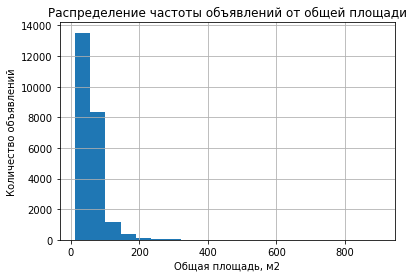

In [97]:
#посмотрим без границ, нужно увеличитьмасштаб
data_cleared['total_area'].hist(bins=20)

plt.title("Распределение частоты объявлений от общей площади")
plt.xlabel("Общая площадь, м2")
plt.ylabel("Количество объявлений")

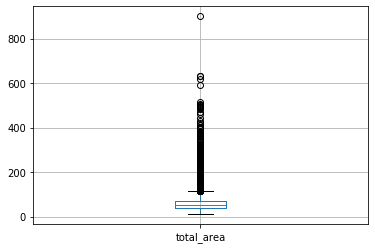

In [40]:
data_cleared.boxplot(column='total_area')
#да, есть выбивающиеся значения

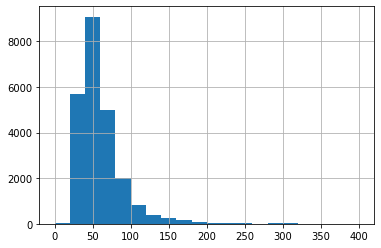

In [41]:
data_cleared['total_area'].hist(bins=20, range=(0, 400))
#уже лучше: большинство квартир ок.9000 объявлений площадью ок 50 кв.м

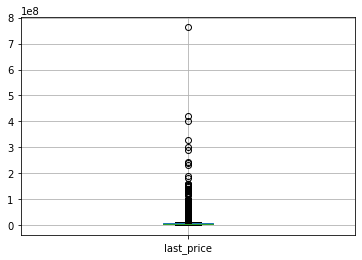

In [42]:
data_cleared.boxplot(column='last_price')
#тут еще больше значения, что даже ящик с усами не увидеть:)

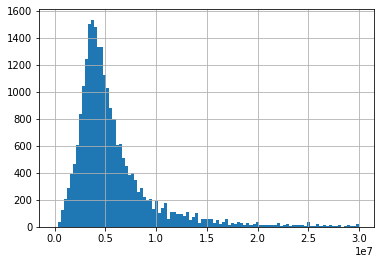

In [43]:
data_cleared['last_price'].hist(bins=100, range=(0, 30000000)) # поставим границы. красота, а не распределение!:)


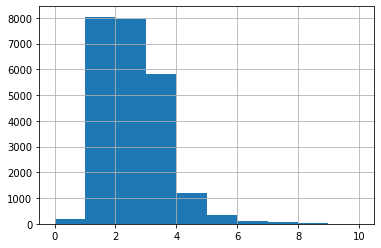

In [44]:
data_cleared['rooms'].hist(bins=10, range=(0, 10))
# в целом уже понятно, что большинство квартир 1, 2 комнатные, 3 чуть поменьше 

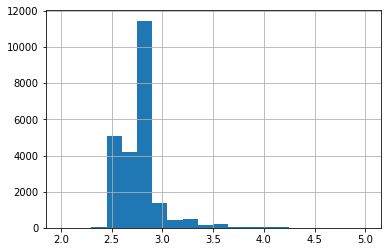

In [45]:
data_cleared['ceiling_height'].hist(bins=20, range=(2, 5))
#значения большинства > 20000 объявлений с высотой потолков до 3 метров

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [46]:
data_cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 20 columns):
last_price              23699 non-null float64
price_m                 23699 non-null float64
total_area              23699 non-null float64
days_exposition         23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
year_exposition         23699 non-null int64
month_exposition        23699 non-null object
weekday_exposition      23699 non-null object
floor_cat               23699 non-null object
living_total_area       21796 non-null float64
kit

In [47]:
#посмотрим в какие дни была продажа квартир. вычитаем из first_day_exposition дни days_exposition и создадим новый столбец

data_cleared['selling_day'] = data_cleared['first_day_exposition']\
                              + pd.to_timedelta(data_cleared['days_exposition'], unit = 'D')


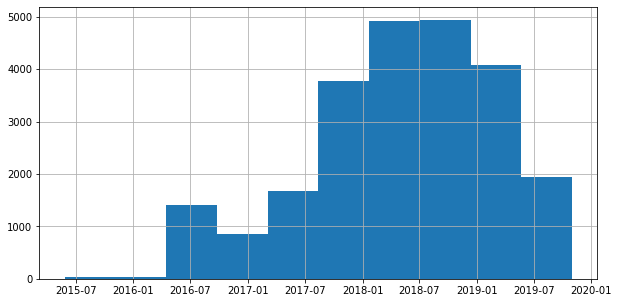

In [48]:
data_cleared['selling_day'].hist(bins=10, figsize=(10, 5))
#на графике видим, что большинство продаж пришлось на 2018 год. сделаем его покрупнее


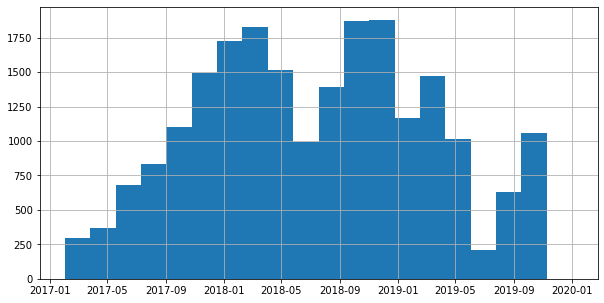

In [49]:
data_cleared['selling_day'].hist(bins=20, figsize=(10, 5), range=('2017.02','2020'))
#мы видим рост числа продаж с 2017 года до начала 2018ого, падение летом и снова рост.
#в 2019 году также летом проседали продажи, но в целом уровень продаж снизился в сравнении с 2018ым
#предполагаю, что вызвано снижением ставки по ипотеке(есть графиики)

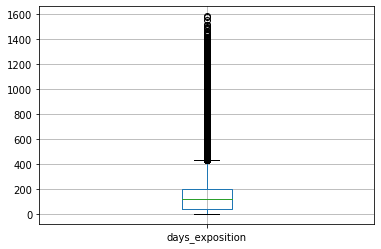

In [50]:
data_cleared.boxplot(column='days_exposition')
#посмотрим на ящике с усами распределения значений

In [51]:
data_cleared['days_exposition'].median() #медиана 124 дня

124.0

In [52]:
data_cleared['days_exposition'].mean() #среднее - 190

180.9035824296384

In [53]:
data_cleared['days_exposition'].value_counts()
#а через такой инструмент видим также, что много значений на 45, 60, 7 и 30 дней
#может указывать на то, что применялись какие то услуги продвижегния или подобные вещи

181.0     3181
45.0       880
60.0       538
7.0        234
30.0       208
          ... 
1049.0       1
951.0        1
693.0        1
1255.0       1
773.0        1
Name: days_exposition, Length: 1142, dtype: int64

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

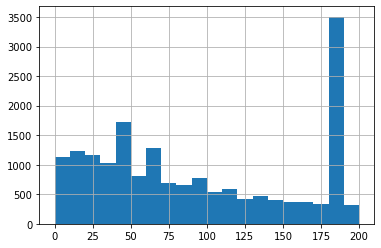

In [54]:
data_cleared['days_exposition'].hist(bins=20,  range=(0, 200))
#сделаем укрепнение графика в начале. видим, что значения идут по убыванию, а на 181 - резкий всплеск
#я думаю дело в том, что объявление снимается автоматически системой и переопубликовывается

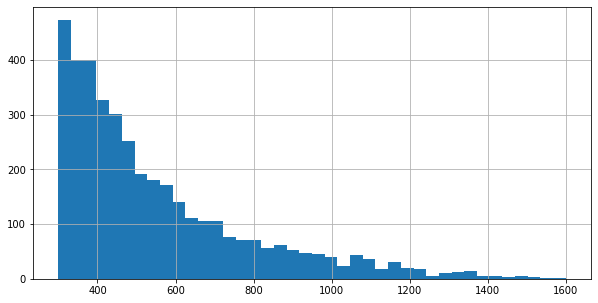

In [55]:
data_cleared['days_exposition'].hist(bins=40,  range=(300, 1600), figsize=(10, 5))
#при рассмотрении "долгого" конца графика, мы видим вполне нормальное сокращение объявлений без выбивающихся значений

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [56]:
#выше мы видели, что в days_exposition есть выбросы в графиках
good_data = data_cleared.query('days_exposition != (0, 30, 45, 60, 90, 181)')

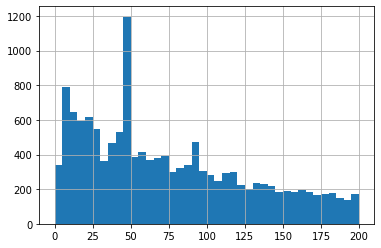

In [57]:
good_data['days_exposition'].hist(bins=40,  range=(0, 200)) 

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Посмотрим зависимость цены кв м от площади

0.3106353690806038

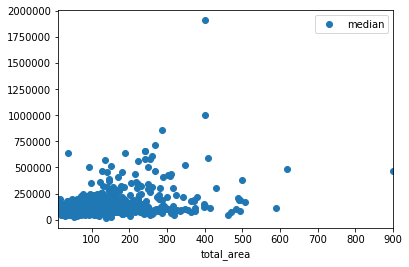

In [58]:
pt_total_area = good_data.pivot_table(index = 'total_area', values = 'price_m', aggfunc = ['mean', 'count', 'median'])

pt_total_area.columns = ['mean', 'count', 'median']
pt_total_area.plot(y = 'median', style = 'o')

pt_total_area.sort_values('median', ascending = False)

good_data['total_area'].corr(good_data['price_m'])

Вывод: смотрим на график и коэф Пирсона 0.31, что говорит о том, что цена незначительно коррелирует с площадью: чем боьше площать, тем выше цена

Зависимость цены и числа комнат

0.059366343206567224

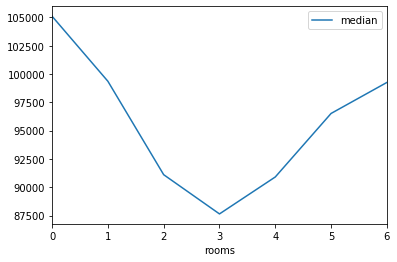

In [59]:
pt_rooms = good_data.pivot_table(index = 'rooms', values = 'price_m', aggfunc = ['mean', 'count', 'median'])

pt_rooms.columns = ['mean', 'count', 'median']
pt_rooms.query('count > 50').plot(y = 'median') #добавим запрос на количество значений больше 50

pt_rooms.sort_values('median', ascending = False)

good_data['rooms'].corr(good_data['price_m'])

Вывод: чем ближе количество комнат к 3 тем ниже стоимость квадратного метра

Смотрим зависимость цены от удаленности от центра

-0.3187284516406851

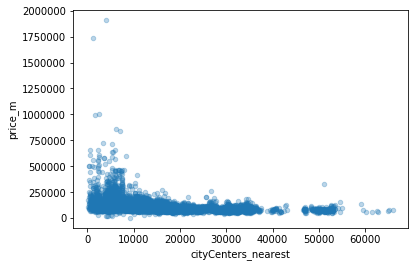

In [60]:
good_data.plot(kind = 'scatter', y = 'price_m', x = 'cityCenters_nearest', alpha = 0.3)

good_data['cityCenters_nearest'].corr(data['price_m'])

На графике видно уплотнение точек и разростание их вверх, чем ближе к центру - тем больше дорогих квартир

зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

,mean,count,median
floor_cat,,,
другой,101859.295407,14631,96873.4
первый,80050.959012,2408,80000.0
последний,92056.571021,2733,87248.3


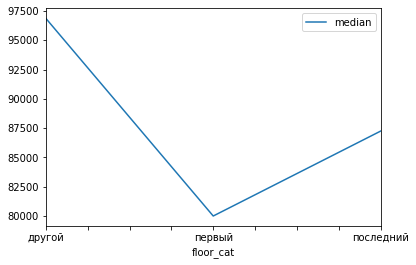

In [61]:
pt_floor = good_data.pivot_table(index = 'floor_cat', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
pt_floor.columns = ['mean', 'count', 'median']
pt_floor.plot(y = 'median')
pt_floor

Вывод: квартиры на первом дешевле всего, на последнем тоже хуже берут в сравнении со всеми остальными

Зависимость от даты размещения: дня недели, месяца и года: weekday_exposition, month_exposition	и  year_exposition

,mean,count,median
weekday_exposition,,,
Friday,97385.377326,3396,93270.2
Monday,97422.516582,2937,93750.0
Saturday,99079.218836,1598,92683.0
Sunday,95846.966384,1413,92857.1
Thursday,98497.218596,3646,94072.7
Tuesday,97876.913024,3486,94230.8
Wednesday,98217.798362,3296,94304.7


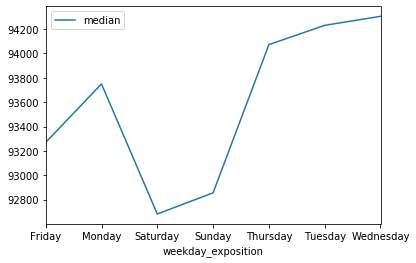

In [62]:
pt_weekday = good_data.pivot_table(index = 'weekday_exposition', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
pt_weekday.columns = ['mean', 'count', 'median']
pt_weekday.plot(y = 'median')
pt_weekday

Вывод: ниже всего цена в субботу и воскресенье, может потому, чтобы подогреть спрос и продать быстрее)

,mean,count,median
month_exposition,,,
May,97833.311131,1132,92252.55
June,96849.013961,1626,92298.70
March,96189.948898,1906,92913.70
December,98227.090439,1391,92982.50
April,99121.773784,1480,93198.10
July,98497.988157,1503,93478.30
February,96652.062882,2193,93506.50
October,96870.878492,1883,93750.00
January,98161.991470,1231,94210.50


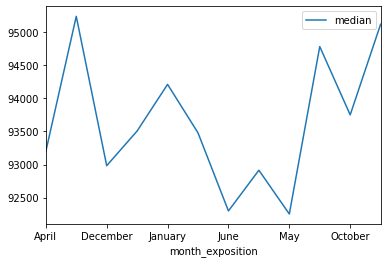

In [63]:
pt_month = good_data.pivot_table(index = 'month_exposition', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
pt_month.columns = ['mean', 'count', 'median']
pt_month.plot(y = 'median')
pt_month.sort_values(by='median')

Вывод: летние месяцы характеизуются пониженным спросом и от этого и цену делают ниже, чтобы быстрее продать 

,mean,count,median
year_exposition,,,
2014,120637.589076,119,105157.90
2015,102545.205888,1121,92785.70
2016,97936.765346,2675,91555.60
2017,97014.198547,7638,92090.35
2018,96507.886331,7199,95000.00
2019,105502.010392,1020,103100.95


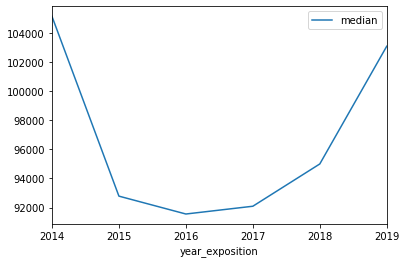

In [64]:
pt_year = good_data.pivot_table(index = 'year_exposition', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
pt_year.columns = ['mean', 'count', 'median']
pt_year.plot(y = 'median')
pt_year

Вывод: видим хороший провал в яме 2015-16-17, скорее всего по высокой ставке ипотеки - оттужа и снижение цены для повышения спроса

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [65]:
top10_cities = good_data['locality_name'].value_counts().head(10)
top10_cities

#10 населенных пунктов с самым большим количеством объявлений

Санкт-Петербург      13061
посёлок Мурино         504
посёлок Шушары         389
Всеволожск             331
Колпино                301
Пушкин                 297
посёлок Парголово      286
деревня Кудрово        286
Гатчина                259
Выборг                 204
Name: locality_name, dtype: int64

In [100]:
data_for_vis = good_data[['last_price', 'price_m', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
data_for_vis

,last_price,price_m,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.739458,0.644013,0.355721,-0.195106
price_m,0.739458,1.000000,0.310635,0.059366,-0.318728
total_area,0.644013,0.310635,1.000000,0.760151,-0.229575
rooms,0.355721,0.059366,0.760151,1.000000,-0.187083
cityCenters_nearest,-0.195106,-0.318728,-0.229575,-0.187083,1.000000


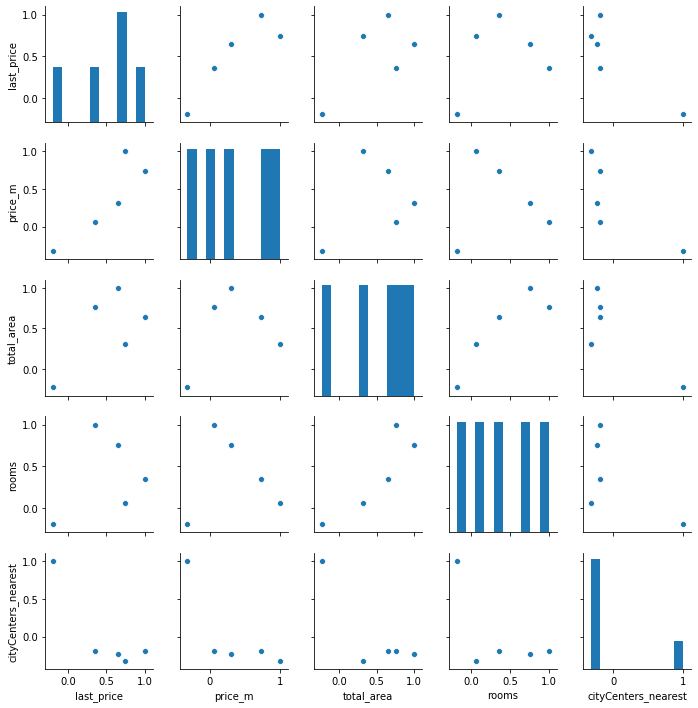

In [108]:
import seaborn as sns
sns.pairplot(data_for_vis, height = 2, aspect = 1)

In [66]:
top10_cities_pt = good_data.pivot_table(index = 'locality_name', values = 'price_m', aggfunc=['count', 'mean'])
top10_cities_pt.columns = ['count', 'mean']
top10_cities_pt = top10_cities_pt.sort_values('count', ascending = False).head(10)
top10_cities_pt



,count,mean
locality_name,,
Санкт-Петербург,13061,112591.603009
посёлок Мурино,504,85660.046230
посёлок Шушары,389,77916.405913
Всеволожск,331,68348.375227
Колпино,301,74923.889701
Пушкин,297,102280.194949
посёлок Парголово,286,89494.925524
деревня Кудрово,286,92436.627622
Гатчина,259,67742.873359


In [67]:
#самая высокая стоимость
top10_cities_pt[top10_cities_pt['mean'] == top10_cities_pt['mean'].max()]


,count,mean
locality_name,,
Санкт-Петербург,13061,112591.603009


In [68]:
#самая низкая стоимость
top10_cities_pt[top10_cities_pt['mean'] == top10_cities_pt['mean'].min()]

,count,mean
locality_name,,
Выборг,204,56847.342157


Вывод: самая высокая цена в Санкт-Петербурге, а самая низкая - в Выборге

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [69]:
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest'] / 1000
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].fillna(100)
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].astype('int')
good_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,last_price,price_m,total_area,days_exposition,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,year_exposition,month_exposition,weekday_exposition,floor_cat,living_total_area,kitchen_total_area,selling_day,cityCenters_nearest_km
1,3350000.0,82920.8,40.40,81.0,2018-12-04,1,2.77,11,18.6,1,11.0,2.0,посёлок Шушары,18603.0,2018,December,Tuesday,первый,0.460396,0.272277,2019-02-23,18
2,5196000.0,92785.7,56.00,558.0,2015-08-20,2,2.77,5,34.3,4,8.3,0.0,Санкт-Петербург,13933.0,2015,August,Thursday,другой,0.612500,0.148214,2017-02-28,13
3,64900000.0,408176.1,159.00,424.0,2015-07-24,3,2.77,14,NaN,9,0.0,0.0,Санкт-Петербург,6800.0,2015,July,Friday,другой,NaN,0.000000,2016-09-20,6
4,10000000.0,100000.0,100.00,121.0,2018-06-19,2,3.03,14,32.0,13,41.0,0.0,Санкт-Петербург,8098.0,2018,June,Tuesday,другой,0.320000,0.410000,2018-10-18,8
5,2890000.0,95065.8,30.40,55.0,2018-09-10,1,2.77,12,14.4,5,9.1,0.0,городской посёлок Янино-1,NaN,2018,September,Monday,другой,0.473684,0.299342,2018-11-04,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,9470000.0,129904.0,72.90,519.0,2016-10-13,2,2.75,25,40.3,7,10.6,1.0,Санкт-Петербург,4489.0,2016,October,Thursday,другой,0.552812,0.145405,2018-03-16,4
23692,1350000.0,45000.0,30.00,413.0,2017-07-07,1,2.77,5,17.5,4,6.0,0.0,Тихвин,NaN,2017,July,Friday,другой,0.583333,0.200000,2018-08-24,100
23693,4600000.0,73717.9,62.40,239.0,2016-08-05,3,2.60,9,40.0,8,8.0,0.0,Петергоф,34104.0,2016,August,Friday,другой,0.641026,0.128205,2017-04-01,34
23695,3100000.0,52542.4,59.00,45.0,2018-01-15,3,2.77,5,38.0,4,8.5,0.0,Тосно,NaN,2018,January,Monday,другой,0.644068,0.144068,2018-03-01,100


,price_m
cityCenters_nearest_km,
0,176295.760870
1,156372.524352
2,144217.039095
3,126875.230296
4,136511.594400
5,146713.371405
6,145280.913172
7,142707.700890
8,118631.347858


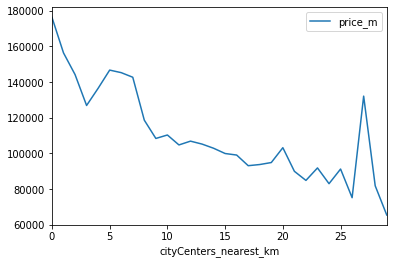

In [70]:
pt_center = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=100')\
                            .pivot_table(index = 'cityCenters_nearest_km', values = 'price_m',\
                            aggfunc = 'mean')
pt_center.plot()
pt_center.head(10)

Вывод: после 7ого километра идет спад цены с 140 до 118 за квадрат

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [71]:
#выделим квартиры в центре, беря за радиус 7 км
data_center_spb = good_data.query('cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург"')
data_center_spb.shape

(2982, 22)

Смотрим на зависимости цены от площади в центре

,mean,count,median
total_area,,,
113.0,188091.014286,7,208849.60
109.0,178036.683333,6,190990.80
114.0,256951.900000,6,164912.25
160.0,202341.666667,9,162500.00
123.0,183089.433333,6,159024.40
...,...,...,...
79.0,106482.821429,14,95569.60
115.0,148101.450000,6,94347.85
93.0,131315.850000,16,93817.20


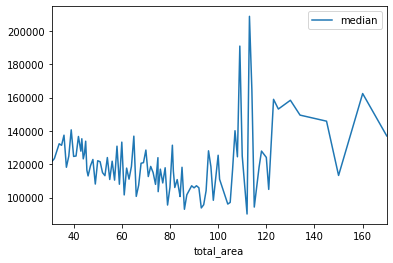

In [72]:
data_center_spb_area_pt = data_center_spb.pivot_table(index = 'total_area', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
data_center_spb_area_pt.columns = ['mean', 'count', 'median']
data_center_spb_area_pt.query('count > 5').plot(y = 'median')

data_center_spb_area_pt.query('count > 5').sort_values('median', ascending = False)

Вывод: если провести среднюю, то видно, цена с небольших площадей уменьшается до 100, а после идут какие то вбросы и с натяжкой можно сказать, что цена снова растет. Нужен дополнительный анализ выбивающихся значений

Смотрим на зависимости цены от высоты потолков в центре

,mean,count,median
ceiling_height,,,
3.01,248978.666667,3,255020.10
3.53,291969.433333,3,240825.70
3.04,198708.750000,4,203721.55
3.11,199097.260000,5,178023.30
3.06,163032.150000,4,167491.10


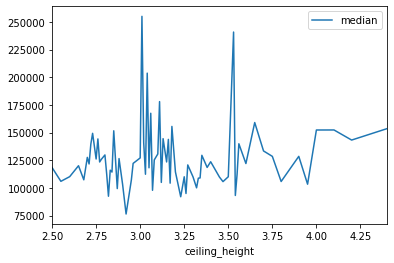

In [73]:
data_center_spb_ceiling_pt = data_center_spb.pivot_table(index = 'ceiling_height', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
data_center_spb_ceiling_pt.columns = ['mean', 'count', 'median']
data_center_spb_ceiling_pt.query('count > 2').plot(y = 'median')

data_center_spb_ceiling_pt.query('count > 2').sort_values('median', ascending = False).head()

Вывод: видим увеличение цены для квартир с потолками от 3 метров

Смотрим на зависимости цены от количества комнат в центре

,mean,count,median
rooms,,,
1,146644.807966,477,139547.00
2,136536.988294,897,123333.30
3,140117.269493,908,113709.80
4,141289.806888,392,109143.15
6,165202.010000,60,102996.45
5,147279.508380,179,102604.20


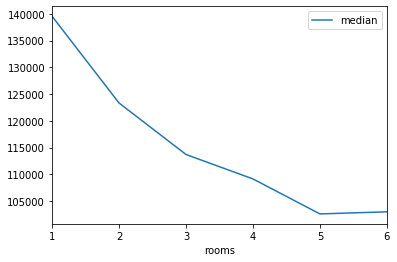

In [74]:
data_center_room_spb_pt = data_center_spb.pivot_table(index = 'rooms', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
data_center_room_spb_pt.columns = ['mean', 'count', 'median']
data_center_room_spb_pt.query('count > 50').plot(y = 'median')

data_center_room_spb_pt.query('count > 50').sort_values('median', ascending = False)

Вывод: мы видим, что цена за квадрат сильно уменьшается с увеличением комнат

Смотрим на зависимости цены от этажа в центре

,mean,count,median
floor_cat,,,
другой,146211.215202,2151,125799.6
последний,139983.638058,515,114079.9
первый,115879.003797,316,107603.6


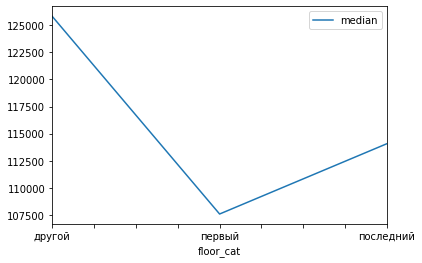

In [75]:
data_center_floor_spb_pt = data_center_spb.pivot_table(index = 'floor_cat', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
data_center_floor_spb_pt.columns = ['mean', 'count', 'median']
data_center_floor_spb_pt.plot(y = 'median')

data_center_floor_spb_pt.sort_values('median', ascending = False)

Вывод: похожая история с общей выборкой, не хотят на первых этажах. Хотя коммерческая недвига была бы очень востребована. Но это уже другая история:)

Смотрим на зависимости цены от удаленности в центре

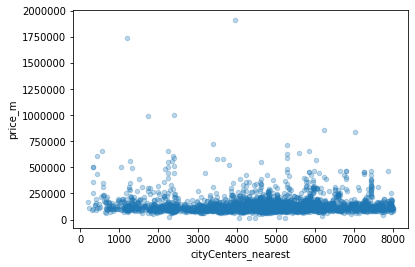

In [76]:
data_center_spb.plot(kind = 'scatter', y = 'price_m', x = 'cityCenters_nearest', alpha = 0.3)

Вывод: четкой зависимости не видим, но мы уже делали выборку же по центру

Смотрим на зависимости цены от даты размещения в центре

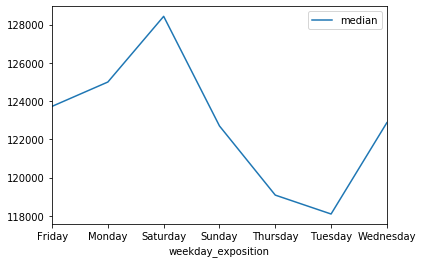

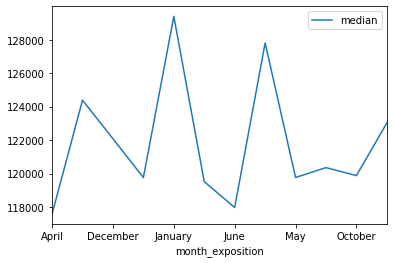

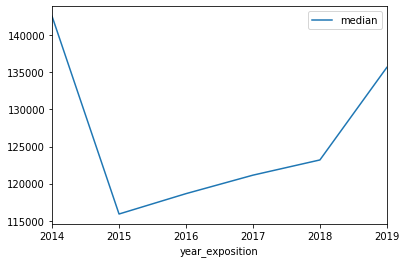

In [77]:
data_center_weekday_spb_pt = data_center_spb.pivot_table(index = 'weekday_exposition', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
data_center_weekday_spb_pt.columns = ['mean', 'count', 'median']
data_center_weekday_spb_pt.plot(y = 'median')

data_center_month_spb_pt = data_center_spb.pivot_table(index = 'month_exposition', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
data_center_month_spb_pt.columns = ['mean', 'count', 'median']
data_center_month_spb_pt.plot(y = 'median')

data_center_year_spb_pt = data_center_spb.pivot_table(index = 'year_exposition', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
data_center_year_spb_pt.columns = ['mean', 'count', 'median']
data_center_year_spb_pt.plot(y = 'median')
#data_center_weekday_spb_pt.sort_values('median', ascending = False)

Вывод: просадки во вторник - не как в общей выборке! В июне - похоже с общей выборкой , а по годам дела обстоят немного подругому, что в 2015ый, посткризисный год начался рост, а в общей - только с 2016ого

## Общий вывод

Мы провели анализ и обработали архив объявлений на продажу квартир в Санкт-Петербурге и окрестностям.

Обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы.

Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 

Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. 

Были определены аномалии в данных параметрах. 

Изучая время продажи квартир мы выявили, что  есть ровные значения снятия публикаций - 181, 90, 60, 45, 30. Скорее всего, это система объявлений - Яндекс Недвижимость снимала объявления.

Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. 
Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 7 километров и проводили уже анализ для центра.

Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. 

Зная, что в 2014 году был обвал рынка недвижимости, мы это видим на графиках общих и центр, но восстановление цены в центере началось уже в 2015ом, а общем - в 2016ом.

В целом еще необходимо учитывать и другие момнеты, как возраст дома, необходим ли ремонт и другие параметры, т.к. в Санкт-Петербурге прекрасный, но старинный исторический центр.